In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import os
import visualkeras
from PIL import ImageFont

In [2]:
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf" # change this to the path of the font file in your system
font = ImageFont.truetype(font_path, 12)

In [3]:
file_path = "/home/roderickperez/DS_projects/autoencoders/images/MNIST/Num_Layers/"

In [6]:
# Acquire MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape data
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

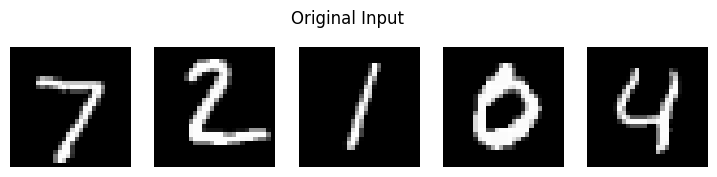

In [7]:
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
  
plt.suptitle('Original Input')
plt.show()

In [8]:
input_dim = 28*28
latent_vec_dim = 2

input_layer = Input(shape=(input_dim,))

### One Encoder Layer | One Decoder Layer

In [9]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(latent_vec_dim, activation='tanh')(input_layer)
encoder = enc_layer_1

# Then build the decoder
dec_layer_1 = Dense(input_dim, activation='sigmoid')(encoder)
decoder = dec_layer_1

# Connect both encoder and decoder
autoencoder_layer1 = Model(input_layer, decoder, name='Autoencoder_1')

# Latent representation (Optional)
latent_model1 = Model(input_layer, encoder)

# Get summary
autoencoder_layer1.summary()

Model: "Autoencoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 784)               2352      
                                                                 
Total params: 3922 (15.32 KB)
Trainable params: 3922 (15.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
118/118 [==============================] - 4s 6ms/step - loss: 0.6338 - val_loss: 0.5761
Epoch 2/10
118/118 [==============================] - 1s 4ms/step - loss: 0.5336 - val_loss: 0.4959
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4664 - val_loss: 0.4402
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4191 - val_loss: 0.4006
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.3852 - val_loss: 0.3718
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.3604 - val_loss: 0.3505
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.3419 - val_loss: 0.3344
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.3278 - val_loss: 0.3221
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.3170 - val_loss: 0.3125
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


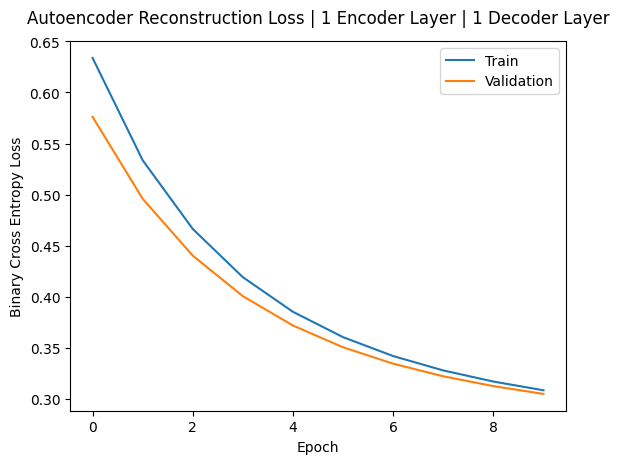

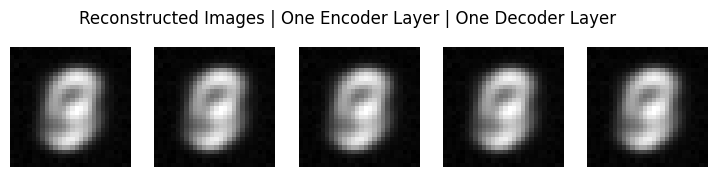

In [10]:
# Compile the autoencoder model
autoencoder_layer1.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history1 = autoencoder_layer1.fit(train_images, train_images, epochs=10, batch_size=512,
                          shuffle=True, validation_data=(test_images, test_images))

# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss | 1 Encoder Layer | 1 Decoder Layer', pad=13)
plt.legend(loc='upper right')


# Testing the model by reconstructing
reconstructed_images1 = autoencoder_layer1.predict(test_images)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images1[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.suptitle('Reconstructed Images | One Encoder Layer | One Decoder Layer')
plt.show()

313/313 [==============================] - 0s 1ms/step


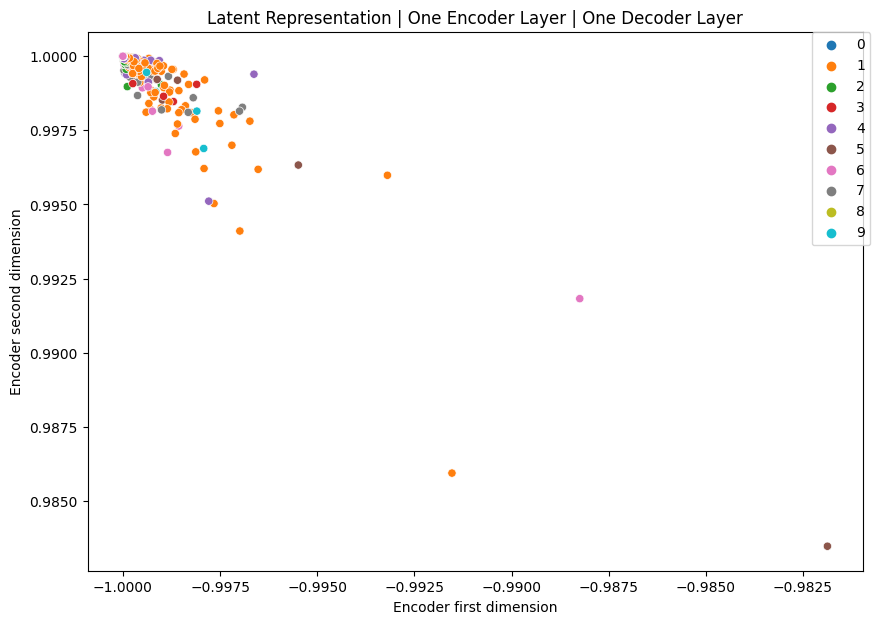

In [9]:
latent_representation1 = latent_model1.predict(test_images)

plt.figure(figsize=(10, 7))

sns.scatterplot(x=latent_representation1[:,0],
                y=latent_representation1[:,1],
                hue=test_labels, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

plt.title("Latent Representation | One Encoder Layer | One Decoder Layer")
plt.show()

In [10]:
visualkeras.layered_view(autoencoder_layer1, legend=True, font=font).save(file_path + "autoencoder_layer1.png") # save image to file | , scale_xy=1, scale_z=1, max_z=1000

---

### Autoencoder with two hidden layers

In [11]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(10, activation='tanh')(input_layer)
enc_layer_2 = Dense(latent_vec_dim, activation='tanh')(enc_layer_1)
encoder = enc_layer_2

# Then build the decoder
dec_layer_1 = Dense(10, activation='sigmoid')(encoder)
dec_layer_2 = Dense(input_dim, activation='sigmoid')(dec_layer_1)
decoder = dec_layer_2

# Connect both encoder and decoder
autoencoder_layer2 = Model(input_layer, decoder, name='Autoencoder_2')

# Latent representation (Optional)
latent_model2 = Model(input_layer, encoder)

# Get summary
autoencoder_layer2.summary()

Model: "Autoencoder_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 784)               8624      
                                                                 
Total params: 16526 (64.55 KB)
Trainable params: 16526 (64.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
118/118 [==============================] - 2s 7ms/step - loss: 0.5663 - val_loss: 0.4594
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.3969 - val_loss: 0.3503
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.3256 - val_loss: 0.3072
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2968 - val_loss: 0.2886
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2836 - val_loss: 0.2794
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2767 - val_loss: 0.2742
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2727 - val_loss: 0.2711
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2702 - val_loss: 0.2690
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2685 - val_loss: 0.2676
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


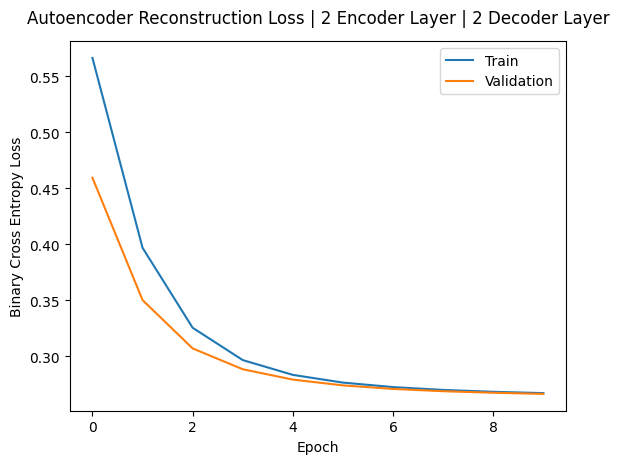

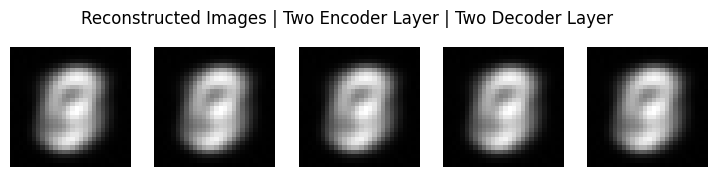

In [12]:
# Compile the autoencoder model
autoencoder_layer2.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history2 = autoencoder_layer2.fit(train_images, train_images, epochs=10, batch_size=512,
                          shuffle=True, validation_data=(test_images, test_images))

# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss | 2 Encoder Layer | 2 Decoder Layer', pad=13)
plt.legend(loc='upper right')


# Testing the model by reconstructing
reconstructed_images2 = autoencoder_layer2.predict(test_images)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images2[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.suptitle('Reconstructed Images | Two Encoder Layer | Two Decoder Layer')
plt.show()

313/313 [==============================] - 0s 1ms/step


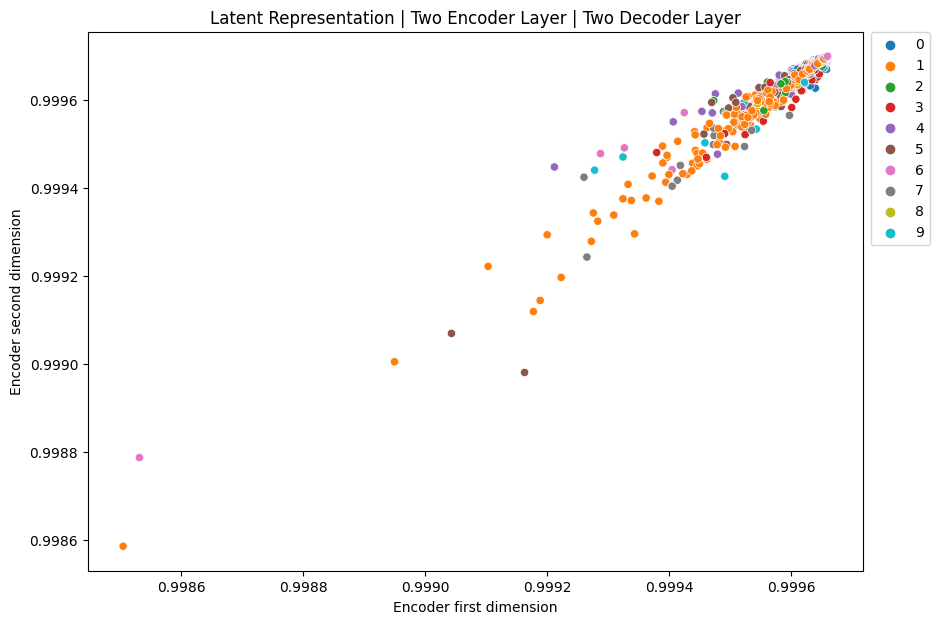

In [13]:
latent_representation2 = latent_model2.predict(test_images)

plt.figure(figsize=(10, 7))

sns.scatterplot(x=latent_representation2[:,0],
                y=latent_representation2[:,1],
                hue=test_labels, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

plt.title("Latent Representation | Two Encoder Layer | Two Decoder Layer")
plt.show()

In [14]:
visualkeras.layered_view(autoencoder_layer2, legend=True, font=font).save(file_path + "autoencoder_layer2.png") # save image to file | , scale_xy=1, scale_z=1, max_z=1000

---

### Autoencoder with three hidden layers

Model: "Autoencoder_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                                 
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 32)                352       
                                                                 
 dense_11 (Dense)            (None, 784)             

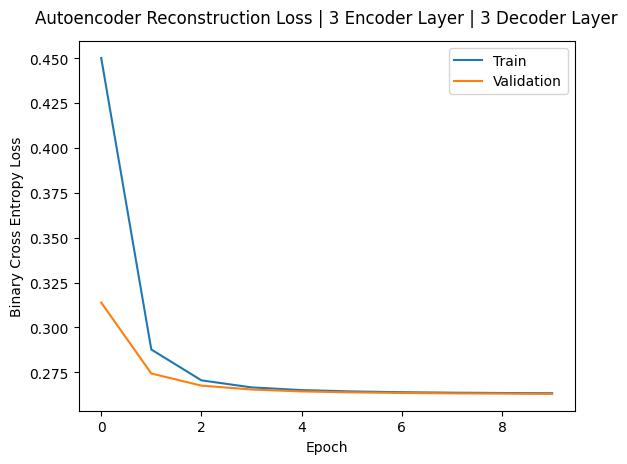

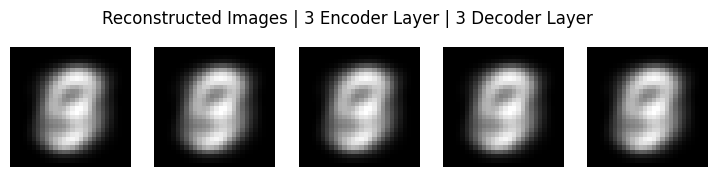

313/313 [==============================] - 0s 1ms/step


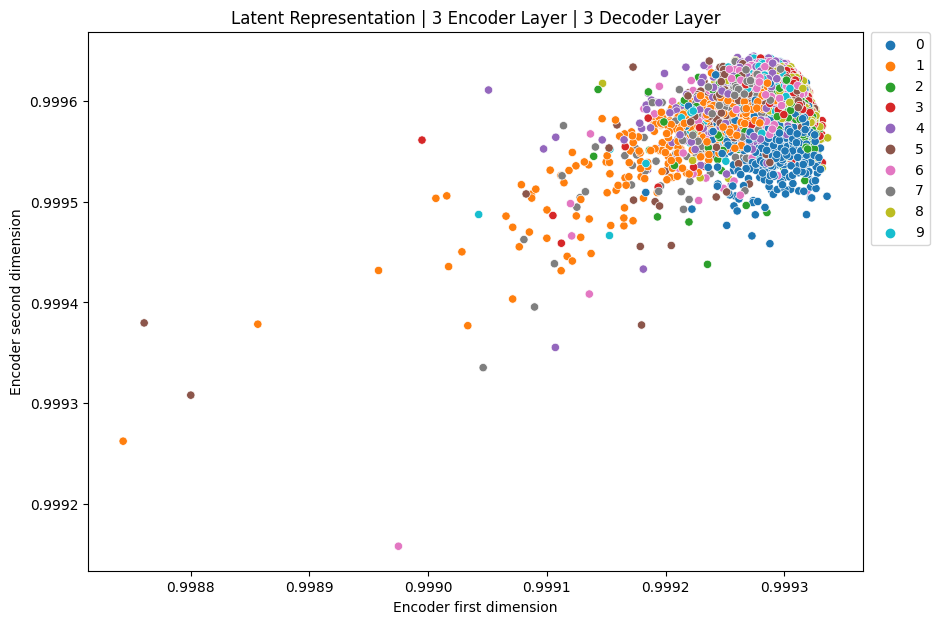

In [15]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(32, activation='tanh')(input_layer)
enc_layer_2 = Dense(10, activation='tanh')(enc_layer_1)
enc_layer_3 = Dense(latent_vec_dim, activation='tanh')(enc_layer_2)
encoder = enc_layer_3

# Then build the decoder
dec_layer_1 = Dense(10, activation='sigmoid')(encoder)
dec_layer_2 = Dense(32, activation='sigmoid')(dec_layer_1)
dec_layer_3 = Dense(input_dim, activation='sigmoid')(dec_layer_2)
decoder = dec_layer_3

# Connect both encoder and decoder
autoencoder_layer3 = Model(input_layer, decoder, name='Autoencoder_3')

# Latent representation (Optional)
latent_model3 = Model(input_layer, encoder)

# Get summary
autoencoder_layer3.summary()
# Compile the autoencoder model
autoencoder_layer3.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history3 = autoencoder_layer3.fit(train_images, train_images, epochs=10, batch_size=512,
                          shuffle=True, validation_data=(test_images, test_images))

# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss | 3 Encoder Layer | 3 Decoder Layer', pad=13)
plt.legend(loc='upper right')


# Testing the model by reconstructing
reconstructed_images3 = autoencoder_layer3.predict(test_images)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images3[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.suptitle('Reconstructed Images | 3 Encoder Layer | 3 Decoder Layer')
plt.show()
latent_representation3 = latent_model3.predict(test_images)

plt.figure(figsize=(10, 7))

sns.scatterplot(x=latent_representation3[:,0],
                y=latent_representation3[:,1],
                hue=test_labels, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

plt.title("Latent Representation | 3 Encoder Layer | 3 Decoder Layer")
plt.show()

In [16]:
visualkeras.layered_view(autoencoder_layer3, legend=True, font=font).save(file_path + "autoencoder_layer3.png") # save image to file | , scale_xy=1, scale_z=1, max_z=1000